# 1) Initialization

In [16]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import datetime
from skimage import measure

In [2]:
path = '/home/tompkins-archive/tompkins/RCEMIP/swift.dkrz.de/dam/'
run  = 'RCE_small300/'
run_large = 'RCE_large300/'
var_dim = '2D/'

In [3]:
small300 = xr.open_mfdataset(path+run+var_dim+"*.nc")
large300 = xr.open_mfdataset(path+run_large+var_dim+"*prw.nc")

/scratch/tbeucler/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/scratch/tbeucler/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).The datasets supplied require both concatenation and merging. From
xarray version 0.14 this will operation will require either using the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset), with a nested list structure such that you can combine
along the dimensions None. Alternati

In [4]:
# import glob
# files = sorted(glob.glob(path+'RCE_small???/'+var_dim+'*.nc'))
# small = xr.open_mfdataset(files,concat_dim='SST')

In [5]:
# files_large = sorted(glob.glob(path+'RCE_large???/'+var_dim+'*.nc'))
# large = xr.open_mfdataset(files_large,concat_dim='SST')

# 2) Metrics
We will compare several metrics:
- I_org  
- Meander number of Prof Windmiller
- MSE spectrum

In [101]:
def calc_WMI(CRH):
    ### Input: precipitable water field (time, x, y)
    ### Returns: aggregation index calculated as 4*area*pi/(perimeter length)**2
    ###          which compares the length of the boundary between the moist and 
    ###          the dry region with the circumference of the moist region
    
    CRH_median = np.median(CRH, axis=(1,2))
    tmp = np.repeat(CRH_median[:, np.newaxis], CRH.shape[1], axis=1)
    CRH_median_rep = np.repeat(tmp[:,:,np.newaxis],CRH.shape[2],axis=2)
    
    binary = CRH>CRH_median_rep
    A_tot = np.sum(binary,axis=(1,2))*(dx**2)/1e12
    
    perimeter_tot = np.zeros(len(CRH_median))
    
    for it in range(len(np.median(CRH,axis=(1,2)))):
        print("calculating time step %i"%it)
        perimeter_tot[it] = dx*measure.perimeter(binary[it,:,:],8)/1e6

    WMI = 4*np.pi*A_tot/perimeter_tot**2
    
    return WMI

In [97]:
CRH = small300.prw/small300.sprw
dx = small300.x.values[1]-small300.x.values[0]
print(CRH.shape)

(2400, 108, 108)


In [100]:
WMIsmall300 WMI(CRH[::24,:,:])

calculating time step 0
calculating time step 1
calculating time step 2
calculating time step 3
calculating time step 4
calculating time step 5
calculating time step 6
calculating time step 7
calculating time step 8
calculating time step 9
calculating time step 10
calculating time step 11
calculating time step 12
calculating time step 13
calculating time step 14
calculating time step 15
calculating time step 16
calculating time step 17
calculating time step 18
calculating time step 19
calculating time step 20
calculating time step 21
calculating time step 22
calculating time step 23
calculating time step 24
calculating time step 25
calculating time step 26
calculating time step 27
calculating time step 28
calculating time step 29
calculating time step 30
calculating time step 31
calculating time step 32
calculating time step 33
calculating time step 34
calculating time step 35
calculating time step 36
calculating time step 37
calculating time step 38
calculating time step 39
calculatin

<xarray.DataArray (time: 100)>
dask.array<shape=(100,), dtype=float64, chunksize=(100,)>
Coordinates:
  * time     (time) timedelta64[ns] 0 days 01:00:00.000028 ... 99 days 01:00:00.000028

TypeError: float() argument must be a string or a number, not 'function'

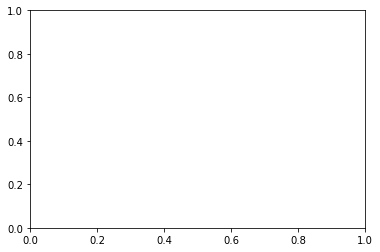

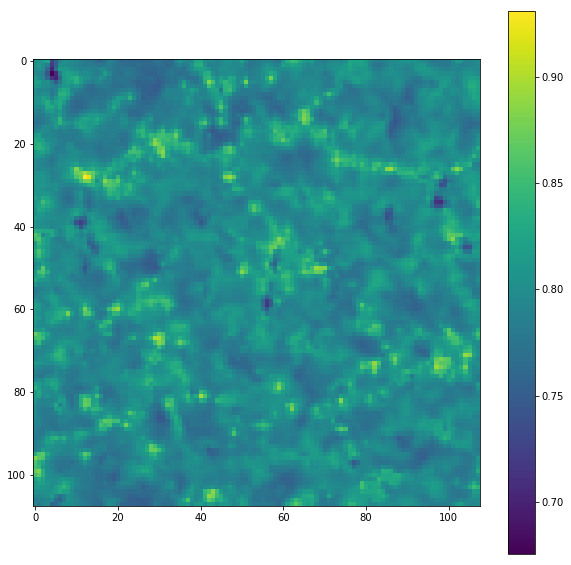

In [72]:
plt.figure(figsize=(10,10))

plt.imshow(CRH[2000,:,:])
plt.colorbar()

(array([0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.00

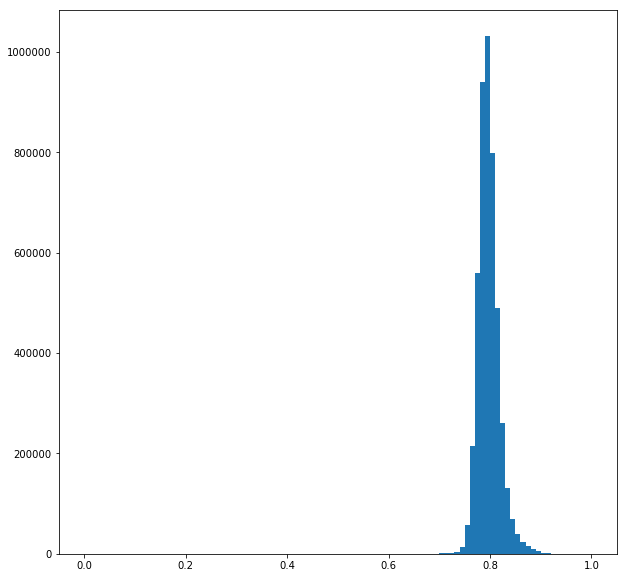

In [73]:
plt.figure(figsize=(10,10))

plt.hist(np.ndarray.flatten(CRH[2000:2400,:,:].values),bins=100,range=(0,1))

In [74]:
CRH_end = CRH[:2400,:,:].values
CRH_end.shape

(2400, 108, 108)

In [75]:
CRH_flat = np.reshape(CRH_end,(2400,108**2))
CRH_flat.shape

(2400, 11664)

In [76]:
CRH_median = np.median(CRH_flat,axis=1)
CRH_median.shape

(2400,)

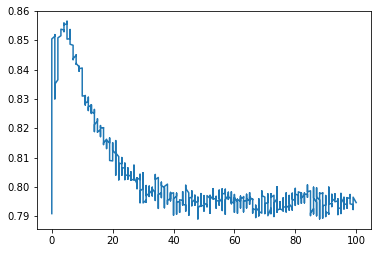

In [77]:
plt.plot(small300.time/(1e9*24*3600),CRH_median)

In [78]:
tmp = np.repeat(CRH_median[:, np.newaxis], CRH.shape[1], axis=1)
CRH_median_rep = np.repeat(tmp[:,:,np.newaxis],CRH.shape[2],axis=2)
CRH_median_rep.shape

(2400, 108, 108)

In [79]:
binary = CRH>CRH_median_rep
binary.shape

(2400, 108, 108)

In [80]:
contours = measure.find_contours(CRH[it,:,:],CRH_median[it])

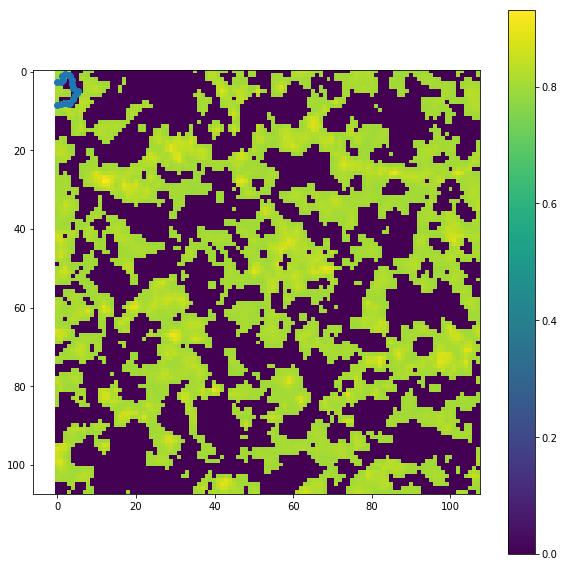

In [81]:
it = 2000

plt.figure(figsize=(10,10))

plt.imshow(CRH[it,:,:]*binary[it,:,:])
plt.colorbar()
# for n, contour in enumerate(contours):
#     plt.plot(contour[:, 1], contour[:, 0], linewidth=2)
plt.scatter(contours[1][:,1],contours[1][:,0])


In [20]:
def Median_binary_mask(Field,)

SyntaxError: invalid syntax (<ipython-input-20-b0e6112a8b00>, line 1)

In [82]:
contours[1].shape

(24, 2)

In [83]:
binary.shape

(2400, 108, 108)

In [84]:
print(small300.x.values[-1:])
print(small300.x.values[0])

[107000.]
0.0


In [85]:
A = np.sum(binary,axis=(1,2))*(dx**2)
A.shape

(2400,)

In [86]:
A.values[0]

5832000000.0

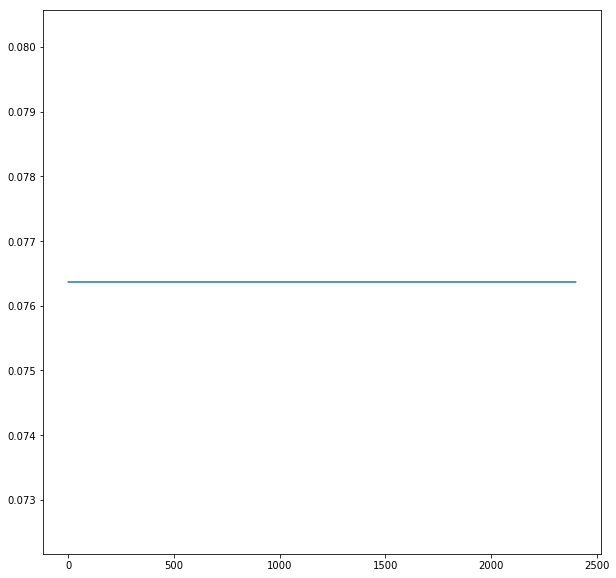

In [87]:
plt.figure(figsize=(10,10))

plt.plot(np.sqrt(A)/1e6)

In [31]:

L = np.zeros((small300.time.values.size,1))
for it,t in enumerate(small300.time.values[::24]/(1e9*24*3600)):
    print(t,it)
    L[it] = dx*measure.perimeter(binary[24*it,:,:],8)/1e6
    print(L[it])

0 nanoseconds 0
[4.31633636]
1 nanoseconds 1
[3.28332695]
2 nanoseconds 2
[3.1388833]
3 nanoseconds 3
[3.27813203]
4 nanoseconds 4
[3.38718481]
5 nanoseconds 5
[3.19684167]
6 nanoseconds 6
[3.0478711]
7 nanoseconds 7
[3.16114928]
8 nanoseconds 8
[3.07832085]
9 nanoseconds 9
[3.15593607]
10 nanoseconds 10
[3.172664]
11 nanoseconds 11
[3.20356349]
12 nanoseconds 12
[3.16549242]
13 nanoseconds 13
[3.09714928]
14 nanoseconds 14
[3.11708431]
15 nanoseconds 15
[3.02780004]
16 nanoseconds 16
[3.10421425]
17 nanoseconds 17
[3.096664]
18 nanoseconds 18
[3.020664]
19 nanoseconds 19
[3.07362846]
20 nanoseconds 20
[3.09335639]
21 nanoseconds 21
[3.18021425]
22 nanoseconds 22
[3.15307821]
23 nanoseconds 23
[3.11421425]
24 nanoseconds 24
[3.06393607]
25 nanoseconds 25
[2.97229141]
26 nanoseconds 26
[3.06624369]
27 nanoseconds 27
[3.04762237]
28 nanoseconds 28
[3.09152186]
29 nanoseconds 29
[3.10993607]
30 nanoseconds 30
[3.10124978]
31 nanoseconds 31
[2.69710155]
32 nanoseconds 32
[3.04169953]
33 na

In [88]:
L[:100].shape

IndexError: invalid index to scalar variable.

In [33]:
A[::24].shape

(100,)

In [34]:
WM = 4*np.expand_dims(A[::24],axis=1)/((1e6*L[:100])**2)

In [35]:
WM.shape

(100, 1)

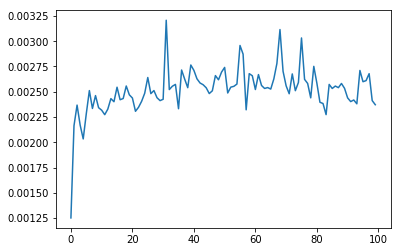

In [36]:
plt.plot(WM)

In [65]:
np.shape(CRH)

(2400, 108, 108)

In [89]:
len(np.median(CRH,axis=(1,2)))
A_tot = np.sum(binary,axis=(1,2))*(dx**2)/1e12
np.shape(A_tot)

(2400,)

# 3) Long-channel simulation - Windmiller number

In [41]:
CRH = large300.prw[::24,:,:]
#/large300.sprw[::24,:,:]
print(CRH.shape)

(100, 144, 2592)


In [42]:
CRH.shape

(100, 144, 2592)

In [43]:
A = CRH[-1:,:,:].values

In [44]:
A.shape

(1, 144, 2592)

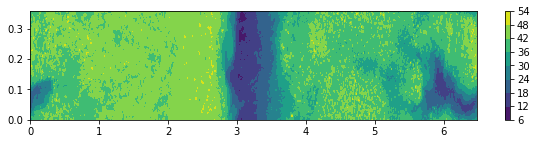

In [45]:
plt.figure(figsize=(10,2))

plt.contourf(large300.x/1e6,large300.y/1e6,A[0,:,:])
plt.colorbar()

In [46]:
CRH_flat = np.reshape(A,(A.shape[0],A.shape[1]*A.shape[2]))
CRH_flat.shape

(1, 373248)

In [47]:
CRH_median = np.percentile(CRH_flat,50,axis=1)
CRH_median.shape

(1,)

In [48]:
CRH_median

array([39.33543522])

In [49]:
tmp = np.repeat(CRH_median[:, np.newaxis], A.shape[1], axis=1)
CRH_median_rep = np.repeat(tmp[:,:,np.newaxis],A.shape[2],axis=2)
CRH_median_rep.shape

(1, 144, 2592)

In [50]:
binary = A>CRH_median_rep
binary.shape

(1, 144, 2592)

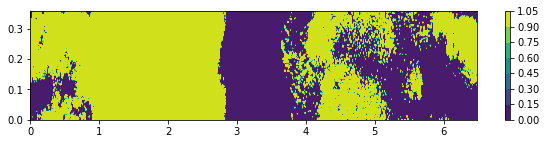

In [51]:
plt.figure(figsize=(10,2))

plt.contourf(large300.x/1e6,large300.y/1e6,binary[0,:,:])
plt.colorbar()

In [52]:
from skimage import measure

dx = small300.x.values[1]-small300.x.values[0]
L = dx*measure.perimeter(binary[0,:,:],8)/1e6
print(L)

23.259168793751172


In [53]:
A = np.sum(binary,axis=(1,2))*(dx**2)/1e12
print(A)

[0.186624]


In [54]:
WM = 4*A/L**2

In [55]:
print(WM)

[0.00137987]


In [56]:
print(WM)

[0.00137987]
